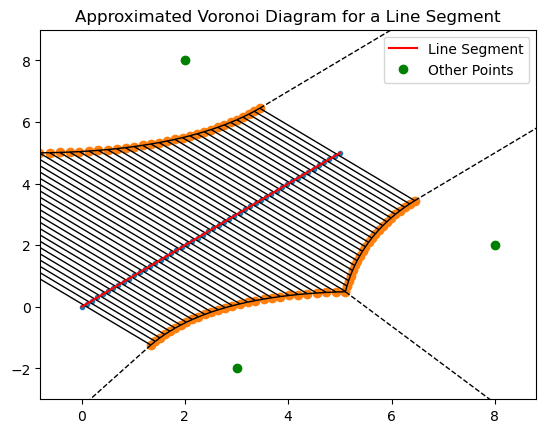

In [40]:
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
import matplotlib.pyplot as plt

# Define the start and end points of the line segment
p1 = np.array([0, 0])
p2 = np.array([5, 5])

# Generate points along the line segment
num_points = 50  # Adjust for desired accuracy
line_points = np.array([p1 + (p2 - p1) * t for t in np.linspace(0, 1, num_points)])

# Add some other "seed" points to see the effect of the segment
other_points = np.array([[2, 8], [8, 2], [3, -2]])
all_points = np.vstack((line_points, other_points))

# Compute the Voronoi diagram
vor = Voronoi(all_points)

# Plot the Voronoi diagram
fig = voronoi_plot_2d(vor)
plt.plot(line_points[:, 0], line_points[:, 1], 'r-', label='Line Segment')
plt.plot(other_points[:, 0], other_points[:, 1], 'go', label='Other Points')
plt.legend()
plt.title('Approximated Voronoi Diagram for a Line Segment')
plt.show()

[1]
xi:-6, xf:-10, yi:-6, yf:-10
xi:6, xf:10, yi:6, yf:10


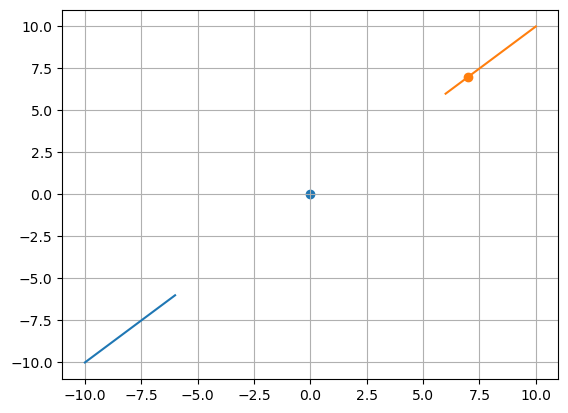

In [ ]:
import pyvoronoi
pv = pyvoronoi.Pyvoronoi(1)

segs = [
    # xi, yi    xf, yf
    [[-6, -6], [-10, -10]], 
    [[6, 6], [10, 10]]
        ]

pts = [
    [0, 0],
    [7, 7]
    ]



# Those two segments do not intersect or overlap anything
pv.AddSegment(segs[0])
pv.AddSegment(segs[1])

# The second point is located on the second segment
pv.AddPoint(pts[0])
pv.AddPoint(pts[1])


# Will return [1] as the second point is on the second segment
invalid_points = pv.GetPointsOnSegments()
print(invalid_points)


for seg in segs:
    print(f"xi:{seg[0][0]}, xf:{seg[1][0]}, yi:{seg[0][1]}, yf:{seg[1][1]}")
    plt.plot([seg[0][0], seg[1][0]], [seg[0][1], seg[1][1]])


for pt in pts:
    plt.scatter(pt[0], pt[1])

plt.grid()

# [seg["U0"].iloc[j], seg["V0"].iloc[j]], [seg["U1"].iloc[j], seg["V1"].iloc[j]]

In [ ]:
from pyvoronoi import Pyvoronoi
import numpy as np
import matplotlib.pyplot as plt

# Example input points
points = np.array([
    [0.1, 0.2],
    [0.4, 0.7],
    [0.8, 0.3],
    [0.6, 0.9],
])

# Build the diagram
v = Pyvoronoi()

# Prepare plotting
fig, ax = plt.subplots(figsize=(6,6))

# Plot original points
ax.scatter(points[:,0], points[:,1], c="red", s=40, zorder=3)

# Plot Voronoi edges
for edge in v.edges:
    if edge.is_finite:
        p = v.vertices[edge.start]
        q = v.vertices[edge.end]
        ax.plot([p.x, q.x], [p.y, q.y], color="black")

    else:
        # Semi-infinite edge: extend a ray
        p = v.vertices[edge.start]
        direction = edge.direction

        # Extend ray for visualization
        qx = p.x + direction.x * 10
        qy = p.y + direction.y * 10
        ax.plot([p.x, qx], [p.y, qy], color="gray", linestyle="--")

ax.set_aspect("equal")
plt.show()


TypeError: Argument 'scaling_factor' has incorrect type (expected int, got list)